# Week-4: ADVANCED CNN ARCHITECTURES AND TRANSFER LEARNING FOR IMAGE CLASSIFICATION

Analysing standard CNN architectures with two image datasets

# Importing Dependencies

In [10]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.callbacks import History
from keras.layers import Conv2D, Dense, Dropout, Flatten, Input, MaxPooling2D, AveragePooling2D
from keras.models import Sequential
from tensorflow.keras.preprocessing.image import DirectoryIterator, ImageDataGenerator

# Preprocess the images of the 2 datasets

In [11]:
#ImageDataGenerator for Cats and Dogs Dataset
train_datagen1: ImageDataGenerator = ImageDataGenerator(rescale = 1./255)
val_datagen1: ImageDataGenerator = ImageDataGenerator(rescale = 1./255)
test_datagen1: ImageDataGenerator = ImageDataGenerator(rescale = 1./255)

#ImageDataGenerator for Face Mask Dataset
train_datagen2: ImageDataGenerator = ImageDataGenerator(rescale = 1./255)
val_datagen2: ImageDataGenerator = ImageDataGenerator(rescale = 1./255)
test_datagen2: ImageDataGenerator = ImageDataGenerator(rescale = 1./255)

In [12]:
# Setting up directories of Cats and Dogs Dataset
cd_base_dir: str = r"C:\Users\asus\Downloads\cats_and_dogs_filtered\cats_and_dogs_filtered"
cd_train_dir: str = f"{cd_base_dir}/train"
cd_val_dir: str = f"{cd_base_dir}/validation"
cd_test_dir: str = f"{cd_base_dir}/test"

# Setting up directories of Face Mask Dataset
fm_base_dir: str = r"C:\Users\asus\Downloads\Face_Mask\Face Mask Dataset"
fm_train_dir: str = f"{fm_base_dir}/Train"
fm_val_dir: str = f"{fm_base_dir}/Validation"
fm_test_dir: str = f"{fm_base_dir}/Test"


In [13]:
#DirectoryIterator for Cats and Dogs Dataset
train_generator1: DirectoryIterator = train_datagen1.flow_from_directory( ##train directory iterator
    cd_train_dir,
    target_size = (128, 128),
    batch_size = 20,
    class_mode = "binary"
)
val_generator1: DirectoryIterator = val_datagen1.flow_from_directory( ##validation directory iterator
    cd_val_dir,
    target_size = (128, 128),
    batch_size = 20,
    class_mode = "binary"
)
test_generator1: DirectoryIterator = test_datagen1.flow_from_directory( ##test directory iterator
    cd_test_dir,
    target_size = (128, 128),
    batch_size = 20,
    class_mode = "binary"
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [14]:
#DirectoryIterator for Face Mask Dataset
train_generator2: DirectoryIterator = train_datagen2.flow_from_directory( ##train directory iterator
    fm_train_dir,
    target_size = (128, 128),
    batch_size = 20,
    class_mode = "binary"
)
val_generator2: DirectoryIterator = val_datagen2.flow_from_directory( ##validation directory iterator
    fm_val_dir,
    target_size = (128, 128),
    batch_size = 20,
    class_mode = "binary"
)
test_generator2: DirectoryIterator = test_datagen2.flow_from_directory( ##test directory iterator
    fm_test_dir,
    target_size = (128, 128),
    batch_size = 20,
    class_mode = "binary"
)

Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 992 images belonging to 2 classes.


# 1. Implementation and Comparison of CNN Architectures

## A. Setting up the LeNet-5 and AlexNet Models

### 1) Lenet-5 Model

In [6]:
lenet_model = Sequential()
lenet_model.add(Input(shape = (128, 128, 3))) #Input Layer
lenet_model.add(Conv2D(6, kernel_size = (5,5), activation = "tanh", strides = 1, padding = "same")) #First Convolution Layer
lenet_model.add(AveragePooling2D(pool_size = (2,2), strides = 2)) #AveragePool Layer
lenet_model.add(Conv2D(16, kernel_size = (5,5), activation = "tanh", strides = 1, padding = "valid")) #Second Convolution Layer
lenet_model.add(AveragePooling2D(pool_size = (2,2), strides = 2)) #AveragePool Layer
lenet_model.add(Flatten()) #Flattening Layer
lenet_model.add(Dense(120, activation = "tanh")) #Dense layer with 120 neurons
lenet_model.add(Dense(84, activation = "tanh")) #Dense layer with 84 neurons
lenet_model.add(Dense(2, activation = "softmax")) #Output layer with 2 neurons

In [7]:
lenet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 6)       456       
                                                                 
 average_pooling2d (AverageP  (None, 64, 64, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 30, 30, 16)       0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 14400)             0         
                                                                 
 dense (Dense)               (None, 120)               1

### 2) AlexNet

In [8]:
alex_model = Sequential()
alex_model.add(Input(shape = (128, 128, 3))) #Input Layer
alex_model.add(Conv2D(96, kernel_size = (11,11), activation = "relu", strides = 4, padding = "valid")) #First Convolution Layer
alex_model.add(MaxPooling2D(pool_size = (3,3), strides = 2)) #MaxPool Layer
alex_model.add(Conv2D(256, kernel_size = (5,5), activation = "relu", strides = 1, padding = "same")) #Second Convolution Layer
alex_model.add(MaxPooling2D(pool_size = (3,3), strides = 2)) #MaxPool Layer
alex_model.add(Conv2D(384, kernel_size = (3,3), activation = "relu", strides = 1, padding = "same")) #Third Convolution Layer
alex_model.add(Conv2D(384, kernel_size = (3,3), activation = "relu", strides = 1, padding = "same")) #Fourth Convolution Layer
alex_model.add(Conv2D(256, kernel_size = (3,3), activation = "relu", strides = 1, padding = "same")) #Fifth Convolution Layer
alex_model.add(MaxPooling2D(pool_size = (3,3), strides = 2)) #MaxPool Layer
alex_model.add(Flatten()) #Flattening Layer
alex_model.add(Dense(4096, activation = "tanh")) #Dense Layer with 4096 neurons
alex_model.add(Dense(4096, activation = "tanh")) #Dense Layer with 4096 neurons
alex_model.add(Dense(2, activation = "softmax")) #Output Layer with 2 neurons

In [9]:
alex_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 96)       0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 256)        0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 6, 6, 384)         885120    
                                                                 
 conv2d_5 (Conv2D)           (None, 6, 6, 384)        

## B. Training, testing and comparing the models on the 2 datasets

### Cats and Dogs Dataset:

In [10]:
#Compiling the LeNet-5 Model
opt = tf.keras.optimizers.Adam(learning_rate = 0.01)

lenet_model.compile(optimizer = opt, loss = "sparse_categorical_crossentropy", metrics=["accuracy"])

In [11]:
# Training LeNet-5
epochs: int = 15
lenet_history: History = lenet_model.fit(train_generator1, epochs = epochs, validation_data = val_generator1)

Epoch 1/15
100/100 [==============================] - 40s 295ms/step - loss: 0.8013 - accuracy: 0.4920 - val_loss: 0.7380 - val_accuracy: 0.5000
Epoch 2/15
100/100 [==============================] - 4s 44ms/step - loss: 0.7299 - accuracy: 0.4950 - val_loss: 0.6937 - val_accuracy: 0.5000
Epoch 3/15
100/100 [==============================] - 4s 42ms/step - loss: 0.7498 - accuracy: 0.4990 - val_loss: 0.7677 - val_accuracy: 0.5000
Epoch 4/15
100/100 [==============================] - 4s 43ms/step - loss: 0.7169 - accuracy: 0.4950 - val_loss: 0.7238 - val_accuracy: 0.5000
Epoch 5/15
100/100 [==============================] - 4s 42ms/step - loss: 0.7275 - accuracy: 0.4980 - val_loss: 0.7095 - val_accuracy: 0.5000
Epoch 6/15
100/100 [==============================] - 4s 42ms/step - loss: 0.7130 - accuracy: 0.5000 - val_loss: 0.7104 - val_accuracy: 0.5000
Epoch 7/15
100/100 [==============================] - 4s 41ms/step - loss: 0.7037 - accuracy: 0.5100 - val_loss: 0.6994 - val_accuracy: 0.50

In [12]:
#Testing Lenet-5
loss, accuracy = lenet_model.evaluate(test_generator1)
print("Accuracy: ", accuracy)
print("Loss: ", loss)

5/5 [==============================] - 1s 171ms/step - loss: 0.7101 - accuracy: 0.5000
Accuracy:  0.5
Loss:  0.7101157903671265


Text(0.5, 1.0, 'Training & Validation Accuracy')

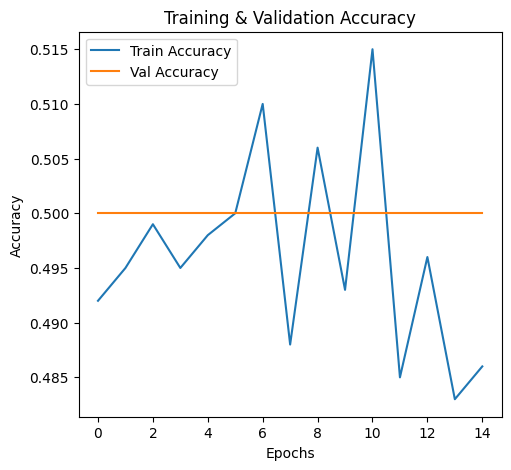

In [13]:
# Plot training & validation accuracy
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(lenet_history.history['accuracy'], label='Train Accuracy')
plt.plot(lenet_history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training & Validation Accuracy')

In [14]:
#Compiling the AlexNet Model
opt = tf.keras.optimizers.Adam(learning_rate = 0.01)

alex_model.compile(optimizer = opt, loss = "sparse_categorical_crossentropy", metrics=["accuracy"])

In [15]:
# Training AlexNet
epochs: int = 15
alex_history: History = alex_model.fit(train_generator1, epochs = epochs, validation_data = val_generator1)

Epoch 1/15
100/100 [==============================] - 6s 43ms/step - loss: 7.9133 - accuracy: 0.4810 - val_loss: 8.7623 - val_accuracy: 0.5000
Epoch 2/15
100/100 [==============================] - 6s 57ms/step - loss: 2.4218 - accuracy: 0.5080 - val_loss: 1.8648 - val_accuracy: 0.5000
Epoch 3/15
100/100 [==============================] - 5s 49ms/step - loss: 3.5163 - accuracy: 0.4960 - val_loss: 1.6874 - val_accuracy: 0.5000
Epoch 4/15
100/100 [==============================] - 4s 42ms/step - loss: 2.5347 - accuracy: 0.4990 - val_loss: 2.2472 - val_accuracy: 0.5000
Epoch 5/15
100/100 [==============================] - 4s 41ms/step - loss: 3.6370 - accuracy: 0.4960 - val_loss: 7.3313 - val_accuracy: 0.5000
Epoch 6/15
100/100 [==============================] - 5s 45ms/step - loss: 4.1598 - accuracy: 0.5070 - val_loss: 6.2633 - val_accuracy: 0.5000
Epoch 7/15
100/100 [==============================] - 4s 45ms/step - loss: 5.1481 - accuracy: 0.5000 - val_loss: 1.5155 - val_accuracy: 0.5000

In [16]:
#Testing AlexNet
loss, accuracy = alex_model.evaluate(test_generator1)
print("Accuracy: ", accuracy)
print("Loss: ", loss)

5/5 [==============================] - 0s 28ms/step - loss: 2.5271 - accuracy: 0.5000
Accuracy:  0.5
Loss:  2.5271482467651367


Text(0.5, 1.0, 'Training & Validation Accuracy')

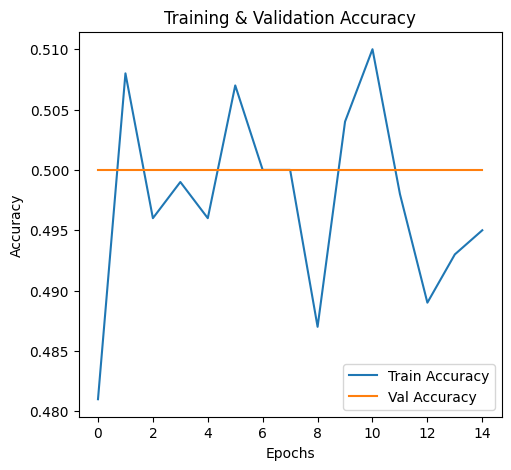

In [17]:
# Plot training & validation accuracy
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(alex_history.history['accuracy'], label='Train Accuracy')
plt.plot(alex_history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training & Validation Accuracy')

### Face Mask Dataset:

In [18]:
#Compiling the LeNet-5 Model
opt = tf.keras.optimizers.Adam(learning_rate = 0.01)

lenet_model.compile(optimizer = opt, loss = "sparse_categorical_crossentropy", metrics=["accuracy"])

In [19]:
# Training LeNet-5
epochs: int = 15
lenet_history: History = lenet_model.fit(train_generator2, epochs = epochs, validation_data = val_generator2)

Epoch 1/15
500/500 [==============================] - 91s 181ms/step - loss: 0.7355 - accuracy: 0.5058 - val_loss: 0.6956 - val_accuracy: 0.5000
Epoch 2/15
500/500 [==============================] - 11s 23ms/step - loss: 0.7336 - accuracy: 0.5028 - val_loss: 0.7262 - val_accuracy: 0.5000
Epoch 3/15
500/500 [==============================] - 11s 22ms/step - loss: 0.7185 - accuracy: 0.5026 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/15
500/500 [==============================] - 11s 22ms/step - loss: 0.7364 - accuracy: 0.5004 - val_loss: 0.7792 - val_accuracy: 0.5000
Epoch 5/15
500/500 [==============================] - 11s 22ms/step - loss: 0.7372 - accuracy: 0.5006 - val_loss: 0.6939 - val_accuracy: 0.5000
Epoch 6/15
500/500 [==============================] - 11s 23ms/step - loss: 0.7243 - accuracy: 0.4886 - val_loss: 0.8183 - val_accuracy: 0.5000
Epoch 7/15
500/500 [==============================] - 12s 24ms/step - loss: 0.7352 - accuracy: 0.5006 - val_loss: 0.7506 - val_accuracy

In [20]:
#Testing Lenet-5
loss, accuracy = lenet_model.evaluate(test_generator2)
print("Accuracy: ", accuracy)
print("Loss: ", loss)

50/50 [==============================] - 8s 159ms/step - loss: 0.7066 - accuracy: 0.4869
Accuracy:  0.4868951737880707
Loss:  0.7066123485565186


Text(0.5, 1.0, 'Training & Validation Accuracy')

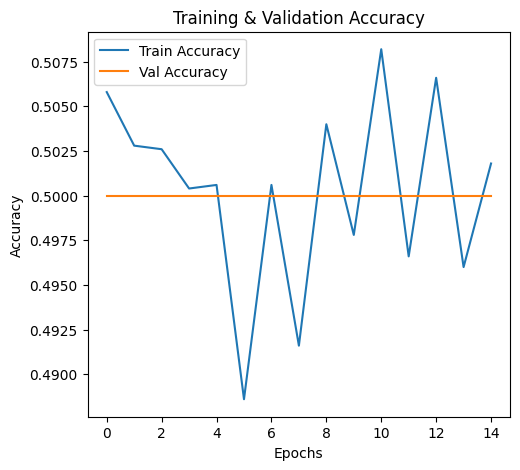

In [21]:
# Plot training & validation accuracy
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(lenet_history.history['accuracy'], label='Train Accuracy')
plt.plot(lenet_history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training & Validation Accuracy')

In [22]:
#Compiling the AlexNet Model
opt = tf.keras.optimizers.Adam(learning_rate = 0.01)

alex_model.compile(optimizer = opt, loss = "sparse_categorical_crossentropy", metrics=["accuracy"])

In [23]:
# Training AlexNet
epochs: int = 15
alex_history: History = alex_model.fit(train_generator2, epochs = epochs, validation_data = val_generator2)

Epoch 1/15
500/500 [==============================] - 12s 23ms/step - loss: 4.7957 - accuracy: 0.5064 - val_loss: 2.8376 - val_accuracy: 0.5000
Epoch 2/15
500/500 [==============================] - 12s 23ms/step - loss: 4.0132 - accuracy: 0.5000 - val_loss: 0.8396 - val_accuracy: 0.5000
Epoch 3/15
500/500 [==============================] - 11s 23ms/step - loss: 5.1240 - accuracy: 0.5066 - val_loss: 7.7853 - val_accuracy: 0.5000
Epoch 4/15
500/500 [==============================] - 11s 23ms/step - loss: 5.0234 - accuracy: 0.4948 - val_loss: 2.1128 - val_accuracy: 0.5000
Epoch 5/15
500/500 [==============================] - 11s 23ms/step - loss: 3.8785 - accuracy: 0.4982 - val_loss: 5.6146 - val_accuracy: 0.5000
Epoch 6/15
500/500 [==============================] - 11s 23ms/step - loss: 3.4381 - accuracy: 0.5022 - val_loss: 0.7859 - val_accuracy: 0.5000
Epoch 7/15
500/500 [==============================] - 11s 23ms/step - loss: 3.4308 - accuracy: 0.4928 - val_loss: 4.5682 - val_accuracy:

In [24]:
#Testing AlexNet
loss, accuracy = alex_model.evaluate(test_generator2)
print("Accuracy: ", accuracy)
print("Loss: ", loss)

50/50 [==============================] - 1s 26ms/step - loss: 0.7694 - accuracy: 0.5131
Accuracy:  0.5131048560142517
Loss:  0.7693745493888855


Text(0.5, 1.0, 'Training & Validation Accuracy')

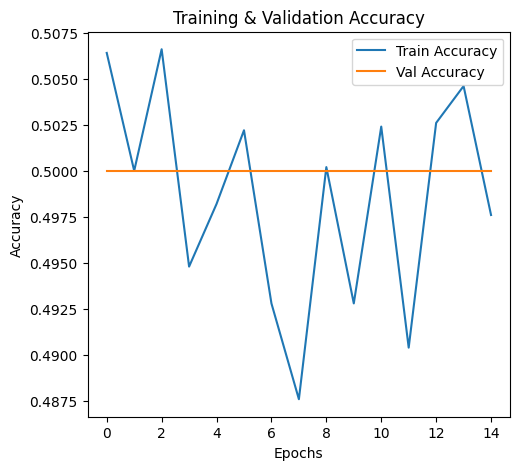

In [25]:
# Plot training & validation accuracy
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(alex_history.history['accuracy'], label='Train Accuracy')
plt.plot(alex_history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training & Validation Accuracy')

Both models have an accuracy of approximately 0.5 for both datasets, which is the same as a random classifier.

# 2. Transfer Learning and Model Performance Analysis

## A. VGG-16

In [27]:
from keras.applications.vgg16 import VGG16
vgg_base_model = VGG16(input_shape=(128, 128, 3), weights = "imagenet", include_top = False)
vgg_base_model.trainable = False

vgg_model = Sequential()
vgg_model.add(vgg_base_model) #Building on the base VGG-16 Model
vgg_model.add(Flatten()) #Flattening Layer
vgg_model.add(Dense(2, activation = "softmax")) #Output layer
vgg_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 dense_6 (Dense)             (None, 2)                 16386     
                                                                 
Total params: 14,731,074
Trainable params: 16,386
Non-trainable params: 14,714,688
_________________________________________________________________


### Cats and Dogs Dataset:

In [28]:
#Compiling the model
opt = keras.optimizers.Adam(learning_rate = 0.01)

vgg_model.compile(optimizer = opt, loss = "sparse_categorical_crossentropy", metrics=["accuracy"])

In [29]:
# Training VGG-16
epochs: int = 15
vgg_model_history: History = vgg_model.fit(train_generator1, epochs = epochs, validation_data = val_generator1)

Epoch 1/15
100/100 [==============================] - 9s 64ms/step - loss: 1.3218 - accuracy: 0.7910 - val_loss: 0.4922 - val_accuracy: 0.8720
Epoch 2/15
100/100 [==============================] - 6s 62ms/step - loss: 0.2755 - accuracy: 0.9220 - val_loss: 0.7507 - val_accuracy: 0.8410
Epoch 3/15
100/100 [==============================] - 6s 62ms/step - loss: 0.2615 - accuracy: 0.9220 - val_loss: 0.7517 - val_accuracy: 0.8490
Epoch 4/15
100/100 [==============================] - 6s 62ms/step - loss: 0.1296 - accuracy: 0.9585 - val_loss: 0.7765 - val_accuracy: 0.8460
Epoch 5/15
100/100 [==============================] - 6s 62ms/step - loss: 0.2495 - accuracy: 0.9395 - val_loss: 0.8983 - val_accuracy: 0.8580
Epoch 6/15
100/100 [==============================] - 6s 63ms/step - loss: 0.1927 - accuracy: 0.9525 - val_loss: 0.8173 - val_accuracy: 0.8760
Epoch 7/15
100/100 [==============================] - 6s 64ms/step - loss: 0.0429 - accuracy: 0.9850 - val_loss: 0.8779 - val_accuracy: 0.8640

In [30]:
#Testing VGG-16
loss, accuracy = vgg_model.evaluate(test_generator1)
print("Accuracy: ", accuracy)
print("Loss: ", loss)

5/5 [==============================] - 0s 48ms/step - loss: 0.0027 - accuracy: 1.0000
Accuracy:  1.0
Loss:  0.0027162465266883373


Text(0.5, 1.0, 'Training & Validation Accuracy')

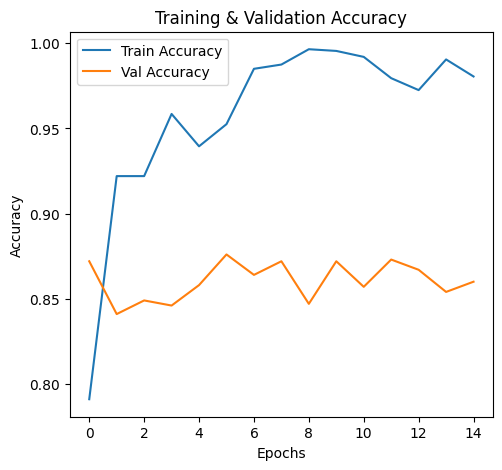

In [31]:
# Plot training & validation accuracy
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(vgg_model_history.history['accuracy'], label='Train Accuracy')
plt.plot(vgg_model_history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training & Validation Accuracy')

### Face Mask Dataset:

In [32]:
#Compiling the model
opt = keras.optimizers.Adam(learning_rate = 0.01)

vgg_model.compile(optimizer = opt, loss = "sparse_categorical_crossentropy", metrics=["accuracy"])

In [33]:
# Training VGG-16
epochs: int = 15
vgg_model_history: History = vgg_model.fit(train_generator2, epochs = epochs, validation_data = val_generator2)

Epoch 1/15
500/500 [==============================] - 28s 55ms/step - loss: 0.2849 - accuracy: 0.9717 - val_loss: 0.3463 - val_accuracy: 0.9712
Epoch 2/15
500/500 [==============================] - 29s 57ms/step - loss: 0.0544 - accuracy: 0.9926 - val_loss: 0.0578 - val_accuracy: 0.9950
Epoch 3/15
500/500 [==============================] - 29s 57ms/step - loss: 0.0605 - accuracy: 0.9930 - val_loss: 0.0842 - val_accuracy: 0.9950
Epoch 4/15
500/500 [==============================] - 29s 57ms/step - loss: 0.0678 - accuracy: 0.9938 - val_loss: 0.1478 - val_accuracy: 0.9812
Epoch 5/15
500/500 [==============================] - 29s 57ms/step - loss: 0.0343 - accuracy: 0.9962 - val_loss: 0.1105 - val_accuracy: 0.9962
Epoch 6/15
500/500 [==============================] - 29s 58ms/step - loss: 0.0418 - accuracy: 0.9960 - val_loss: 0.0412 - val_accuracy: 0.9962
Epoch 7/15
500/500 [==============================] - 30s 60ms/step - loss: 0.0487 - accuracy: 0.9945 - val_loss: 0.4778 - val_accuracy:

In [34]:
#Testing VGG-16
loss, accuracy = vgg_model.evaluate(test_generator2)
print("Accuracy: ", accuracy)
print("Loss: ", loss)

50/50 [==============================] - 9s 185ms/step - loss: 0.2802 - accuracy: 0.9929
Accuracy:  0.992943525314331
Loss:  0.2802031934261322


Text(0.5, 1.0, 'Training & Validation Accuracy')

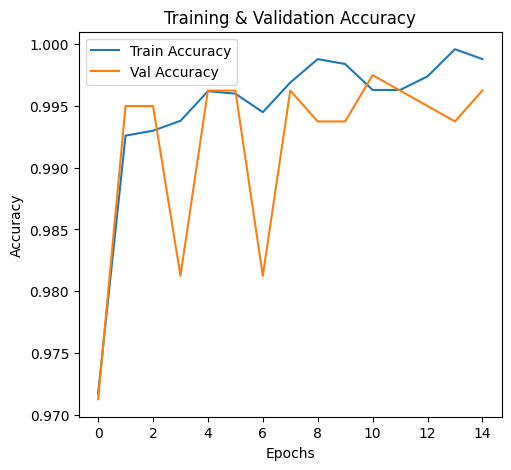

In [35]:
# Plot training & validation accuracy
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(vgg_model_history.history['accuracy'], label='Train Accuracy')
plt.plot(vgg_model_history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training & Validation Accuracy')

The extremely high accuray of this model indicates possible overfitting.

## B. GoogleNet (InceptionV3)

In [15]:

from tensorflow.keras.applications import InceptionV3
googlenet_base_model = InceptionV3(input_shape=(128, 128, 3), weights = "imagenet", include_top = False)
googlenet_base_model.trainable = False

googlenet_model = Sequential()
googlenet_model.add(googlenet_base_model) #Building on the base GoogleNet (InceptionV3) Model
googlenet_model.add(Flatten()) #Flattening Layer
googlenet_model.add(Dense(2, activation = "softmax")) #Output Layer
googlenet_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 2, 2, 2048)        21802784  
                                                                 
 flatten_4 (Flatten)         (None, 8192)              0         
                                                                 
 dense_4 (Dense)             (None, 2)                 16386     
                                                                 
Total params: 21,819,170
Trainable params: 16,386
Non-trainable params: 21,802,784
_________________________________________________________________


### Cats and Dogs Dataset:

In [16]:
#Compiling the model
opt = keras.optimizers.Adam(learning_rate = 0.01)

googlenet_model.compile(optimizer = opt, loss = "sparse_categorical_crossentropy", metrics=["accuracy"])

In [17]:
#Training GoogleNet
epochs: int = 15
googlenet_model_history: History = googlenet_model.fit(train_generator1, epochs = epochs, validation_data = val_generator1)

Epoch 1/15
100/100 [==============================] - 41s 303ms/step - loss: 8.6566 - accuracy: 0.8625 - val_loss: 3.2137 - val_accuracy: 0.9170
Epoch 2/15
100/100 [==============================] - 5s 49ms/step - loss: 3.9109 - accuracy: 0.9200 - val_loss: 4.0799 - val_accuracy: 0.9220
Epoch 3/15
100/100 [==============================] - 5s 50ms/step - loss: 1.9222 - accuracy: 0.9505 - val_loss: 4.5575 - val_accuracy: 0.9080
Epoch 4/15
100/100 [==============================] - 5s 51ms/step - loss: 2.4694 - accuracy: 0.9430 - val_loss: 5.8877 - val_accuracy: 0.9170
Epoch 5/15
100/100 [==============================] - 5s 50ms/step - loss: 1.1137 - accuracy: 0.9705 - val_loss: 5.3140 - val_accuracy: 0.9230
Epoch 6/15
100/100 [==============================] - 5s 48ms/step - loss: 0.9626 - accuracy: 0.9740 - val_loss: 6.1050 - val_accuracy: 0.9110
Epoch 7/15
100/100 [==============================] - 5s 49ms/step - loss: 0.5514 - accuracy: 0.9805 - val_loss: 7.1577 - val_accuracy: 0.91

In [18]:
#Testing GoogleNet
loss, accuracy = googlenet_model.evaluate(test_generator1)
print("Accuracy: ", accuracy)
print("Loss: ", loss)

5/5 [==============================] - 0s 67ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Accuracy:  1.0
Loss:  0.0


Text(0.5, 1.0, 'Training & Validation Accuracy')

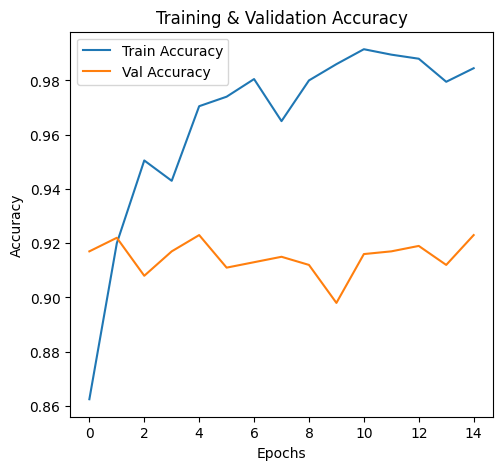

In [19]:
# Plot training & validation accuracy
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(googlenet_model_history.history['accuracy'], label='Train Accuracy')
plt.plot(googlenet_model_history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training & Validation Accuracy')

### Face Mask Dataset:

In [20]:
#Compiling the model
opt = keras.optimizers.Adam(learning_rate = 0.01)

googlenet_model.compile(optimizer = opt, loss = "sparse_categorical_crossentropy", metrics=["accuracy"])

In [21]:
#Training GoogleNet
epochs: int = 15
googlenet_model_history: History = googlenet_model.fit(train_generator2, epochs = epochs, validation_data = val_generator2)

Epoch 1/15
500/500 [==============================] - 52s 98ms/step - loss: 2.0207 - accuracy: 0.9726 - val_loss: 0.4917 - val_accuracy: 0.9887
Epoch 2/15
500/500 [==============================] - 18s 36ms/step - loss: 0.8001 - accuracy: 0.9892 - val_loss: 0.4594 - val_accuracy: 0.9912
Epoch 3/15
500/500 [==============================] - 18s 37ms/step - loss: 0.4552 - accuracy: 0.9940 - val_loss: 0.4459 - val_accuracy: 0.9962
Epoch 4/15
500/500 [==============================] - 19s 38ms/step - loss: 0.4484 - accuracy: 0.9935 - val_loss: 0.2702 - val_accuracy: 0.9962
Epoch 5/15
500/500 [==============================] - 19s 39ms/step - loss: 0.3041 - accuracy: 0.9959 - val_loss: 0.4290 - val_accuracy: 0.9962
Epoch 6/15
500/500 [==============================] - 20s 39ms/step - loss: 0.2632 - accuracy: 0.9962 - val_loss: 0.3008 - val_accuracy: 0.9975
Epoch 7/15
500/500 [==============================] - 20s 39ms/step - loss: 0.2894 - accuracy: 0.9970 - val_loss: 0.3884 - val_accuracy:

In [22]:
#Testing GoogleNet
loss, accuracy = googlenet_model.evaluate(test_generator2)
print("Accuracy: ", accuracy)
print("Loss: ", loss)

50/50 [==============================] - 2s 44ms/step - loss: 0.5789 - accuracy: 0.9960
Accuracy:  0.9959677457809448
Loss:  0.5788645148277283


Text(0.5, 1.0, 'Training & Validation Accuracy')

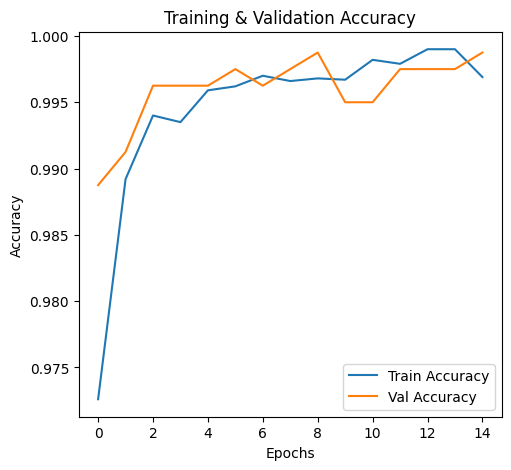

In [23]:
# Plot training & validation accuracy
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(googlenet_model_history.history['accuracy'], label='Train Accuracy')
plt.plot(googlenet_model_history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training & Validation Accuracy')

The extremely high classification accuracy indicates possible overfitting. 

## C. ResNet50

In [25]:
from tensorflow.keras.applications import ResNet50
resnet_base_model = ResNet50(input_shape=(128, 128, 3), weights = "imagenet", include_top = False)
resnet_base_model.trainable = False

resnet_model = Sequential()
resnet_model.add(resnet_base_model) #Building on the base ResNet50 Model
resnet_model.add(Flatten()) #Flattening Layer
resnet_model.add(Dense(2, activation = "softmax")) #Output Layer
resnet_model.summary()

94765736/94765736 [==============================] - 166s 2us/step
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 flatten_5 (Flatten)         (None, 32768)             0         
                                                                 
 dense_5 (Dense)             (None, 2)                 65538     
                                                                 
Total params: 23,653,250
Trainable params: 65,538
Non-trainable params: 23,587,712
_________________________________________________________________


### Cats and Dogs Dataset:

In [26]:
#Compiling the model
opt = keras.optimizers.Adam(learning_rate = 0.01)

resnet_model.compile(optimizer = opt, loss = "sparse_categorical_crossentropy", metrics=["accuracy"])

In [27]:
# Training ResNet50
epochs: int = 15
resnet_model_history: History = resnet_model.fit(train_generator1, epochs = epochs, validation_data = val_generator1)

Epoch 1/15
100/100 [==============================] - 34s 304ms/step - loss: 1.4208 - accuracy: 0.5410 - val_loss: 0.6973 - val_accuracy: 0.6230
Epoch 2/15
100/100 [==============================] - 6s 56ms/step - loss: 0.8361 - accuracy: 0.6030 - val_loss: 0.5838 - val_accuracy: 0.7020
Epoch 3/15
100/100 [==============================] - 6s 56ms/step - loss: 0.6044 - accuracy: 0.6935 - val_loss: 0.5964 - val_accuracy: 0.6890
Epoch 4/15
100/100 [==============================] - 6s 56ms/step - loss: 0.5875 - accuracy: 0.6975 - val_loss: 0.6836 - val_accuracy: 0.6420
Epoch 5/15
100/100 [==============================] - 6s 55ms/step - loss: 0.6202 - accuracy: 0.7100 - val_loss: 0.6026 - val_accuracy: 0.6930
Epoch 6/15
100/100 [==============================] - 6s 56ms/step - loss: 0.7521 - accuracy: 0.6800 - val_loss: 0.7213 - val_accuracy: 0.6530
Epoch 7/15
100/100 [==============================] - 6s 56ms/step - loss: 0.7314 - accuracy: 0.7010 - val_loss: 3.6310 - val_accuracy: 0.51

In [28]:
#Testing ResNet50
loss, accuracy = resnet_model.evaluate(test_generator1)
print("Accuracy: ", accuracy)
print("Loss: ", loss)

5/5 [==============================] - 0s 101ms/step - loss: 0.3749 - accuracy: 0.8700
Accuracy:  0.8700000047683716
Loss:  0.3748689591884613


Text(0.5, 1.0, 'Training & Validation Accuracy')

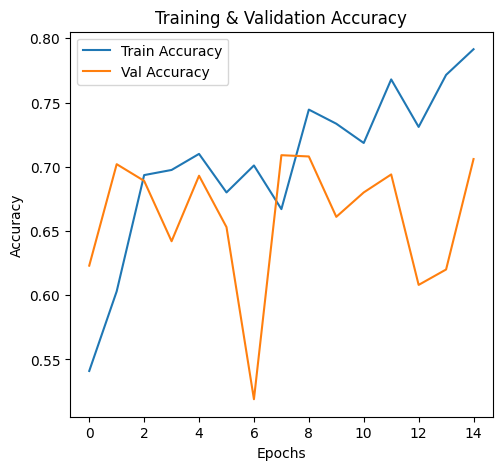

In [29]:
# Plot training & validation accuracy
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(resnet_model_history.history['accuracy'], label='Train Accuracy')
plt.plot(resnet_model_history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training & Validation Accuracy')

### Face Mask Dataset:

In [30]:
#Compiling the model
opt = keras.optimizers.Adam(learning_rate = 0.01)

resnet_model.compile(optimizer = opt, loss = "sparse_categorical_crossentropy", metrics=["accuracy"])

In [31]:
# Training ResNet50
epochs: int = 15
resnet_model_history: History = resnet_model.fit(train_generator2, epochs = epochs, validation_data = val_generator2)

Epoch 1/15
500/500 [==============================] - 42s 78ms/step - loss: 0.6246 - accuracy: 0.7908 - val_loss: 0.2927 - val_accuracy: 0.9025
Epoch 2/15
500/500 [==============================] - 22s 44ms/step - loss: 0.2817 - accuracy: 0.8875 - val_loss: 0.2854 - val_accuracy: 0.9013
Epoch 3/15
500/500 [==============================] - 23s 45ms/step - loss: 0.2519 - accuracy: 0.9061 - val_loss: 0.1774 - val_accuracy: 0.9375
Epoch 4/15
500/500 [==============================] - 23s 45ms/step - loss: 0.2819 - accuracy: 0.9007 - val_loss: 0.3632 - val_accuracy: 0.8763
Epoch 5/15
500/500 [==============================] - 23s 46ms/step - loss: 0.2046 - accuracy: 0.9268 - val_loss: 0.3070 - val_accuracy: 0.8988
Epoch 6/15
500/500 [==============================] - 23s 46ms/step - loss: 0.2564 - accuracy: 0.9150 - val_loss: 0.2053 - val_accuracy: 0.9350
Epoch 7/15
500/500 [==============================] - 23s 46ms/step - loss: 0.4048 - accuracy: 0.9018 - val_loss: 0.2093 - val_accuracy:

In [32]:
#Testing ResNet50
loss, accuracy = resnet_model.evaluate(test_generator2)
print("Accuracy: ", accuracy)
print("Loss: ", loss)

50/50 [==============================] - 2s 47ms/step - loss: 0.1586 - accuracy: 0.9506
Accuracy:  0.9506048560142517
Loss:  0.15858601033687592


Text(0.5, 1.0, 'Training & Validation Accuracy')

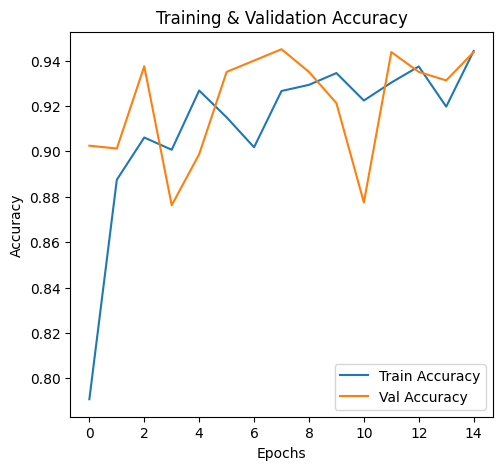

In [33]:
# Plot training & validation accuracy
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(resnet_model_history.history['accuracy'], label='Train Accuracy')
plt.plot(resnet_model_history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training & Validation Accuracy')

This model classified better on the Face Mask dataset than the Cats and Dogs dataset, yet had decent performance altogether.

## D. EfficientNetB0

In [35]:
from tensorflow.keras.applications import EfficientNetB0
effnet_base_model = EfficientNetB0(input_shape=(128, 128, 3), weights = "imagenet", include_top = False)
effnet_base_model.trainable = False

effnet_model = Sequential()
effnet_model.add(effnet_base_model) #Building on the base EfficientNetB0 Model
effnet_model.add(Flatten()) #Flattening Layer
effnet_model.add(Dense(2, activation = "softmax")) #Output Layer
effnet_model.summary()

16705208/16705208 [==============================] - 26s 2us/step
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 4, 4, 1280)       4049571   
                                                                 
 flatten_6 (Flatten)         (None, 20480)             0         
                                                                 
 dense_6 (Dense)             (None, 2)                 40962     
                                                                 
Total params: 4,090,533
Trainable params: 40,962
Non-trainable params: 4,049,571
_________________________________________________________________


### Cats and Dogs Dataset:

In [36]:
#Compiling the model
opt = keras.optimizers.Adam(learning_rate = 0.01)

effnet_model.compile(optimizer = opt, loss = "sparse_categorical_crossentropy", metrics=["accuracy"])

In [37]:
#Training EfficientNet
epochs: int = 15
effnet_model_history: History = effnet_model.fit(train_generator1, epochs = epochs, validation_data = val_generator1)

Epoch 1/15
100/100 [==============================] - 36s 308ms/step - loss: 12.5642 - accuracy: 0.5070 - val_loss: 7.4853 - val_accuracy: 0.5000
Epoch 2/15
100/100 [==============================] - 4s 43ms/step - loss: 7.0351 - accuracy: 0.4940 - val_loss: 6.4401 - val_accuracy: 0.5000
Epoch 3/15
100/100 [==============================] - 4s 41ms/step - loss: 5.9217 - accuracy: 0.5060 - val_loss: 17.4542 - val_accuracy: 0.5000
Epoch 4/15
100/100 [==============================] - 4s 42ms/step - loss: 6.2582 - accuracy: 0.4930 - val_loss: 0.7610 - val_accuracy: 0.5060
Epoch 5/15
100/100 [==============================] - 4s 42ms/step - loss: 4.0721 - accuracy: 0.4925 - val_loss: 4.8755 - val_accuracy: 0.5000
Epoch 6/15
100/100 [==============================] - 4s 43ms/step - loss: 7.2598 - accuracy: 0.5035 - val_loss: 7.8541 - val_accuracy: 0.5000
Epoch 7/15
100/100 [==============================] - 4s 41ms/step - loss: 4.8449 - accuracy: 0.5070 - val_loss: 4.7864 - val_accuracy: 0.

In [38]:
#Testing EfficientNet
loss, accuracy = effnet_model.evaluate(test_generator1)
print("Accuracy: ", accuracy)
print("Loss: ", loss)

5/5 [==============================] - 0s 84ms/step - loss: 0.7221 - accuracy: 0.5000
Accuracy:  0.5
Loss:  0.7220814228057861


Text(0.5, 1.0, 'Training & Validation Accuracy')

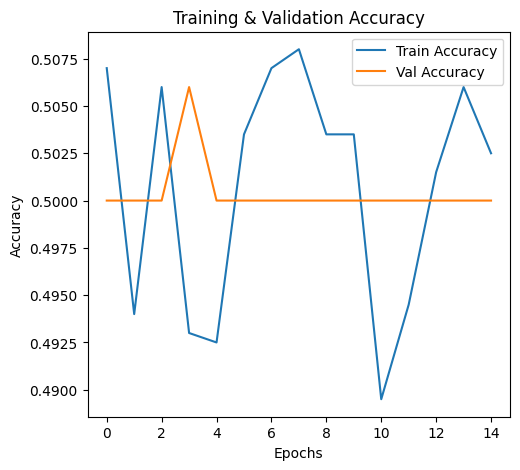

In [39]:
# Plot training & validation Accuracy
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(effnet_model_history.history['accuracy'], label='Train Accuracy')
plt.plot(effnet_model_history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training & Validation Accuracy')

### Face Mask Dataset:

In [40]:
#Compiling the model
opt = keras.optimizers.Adam(learning_rate = 0.01)

effnet_model.compile(optimizer = opt, loss = "sparse_categorical_crossentropy", metrics=["accuracy"])

In [41]:
#Training EfficientNet
epochs: int = 15
effnet_model_history: History = effnet_model.fit(train_generator2, epochs = epochs, validation_data = val_generator2)

Epoch 1/15
500/500 [==============================] - 60s 110ms/step - loss: 6.8879 - accuracy: 0.4974 - val_loss: 12.3038 - val_accuracy: 0.5000
Epoch 2/15
500/500 [==============================] - 16s 31ms/step - loss: 5.4118 - accuracy: 0.5082 - val_loss: 5.0601 - val_accuracy: 0.5000
Epoch 3/15
500/500 [==============================] - 15s 29ms/step - loss: 5.5923 - accuracy: 0.5059 - val_loss: 0.7164 - val_accuracy: 0.5100
Epoch 4/15
500/500 [==============================] - 14s 27ms/step - loss: 4.4085 - accuracy: 0.5154 - val_loss: 13.5182 - val_accuracy: 0.5000
Epoch 5/15
500/500 [==============================] - 14s 28ms/step - loss: 5.8277 - accuracy: 0.5074 - val_loss: 2.9715 - val_accuracy: 0.5038
Epoch 6/15
500/500 [==============================] - 14s 27ms/step - loss: 4.8068 - accuracy: 0.5274 - val_loss: 1.6934 - val_accuracy: 0.5188
Epoch 7/15
500/500 [==============================] - 14s 29ms/step - loss: 4.3916 - accuracy: 0.5358 - val_loss: 0.8558 - val_accura

In [42]:
#Testing EfficientNet
loss, accuracy = effnet_model.evaluate(test_generator2)
print("Accuracy: ", accuracy)
print("Loss: ", loss)

50/50 [==============================] - 2s 31ms/step - loss: 0.5137 - accuracy: 0.7671
Accuracy:  0.7671371102333069
Loss:  0.5137200355529785


Text(0.5, 1.0, 'Training & Validation Accuracy')

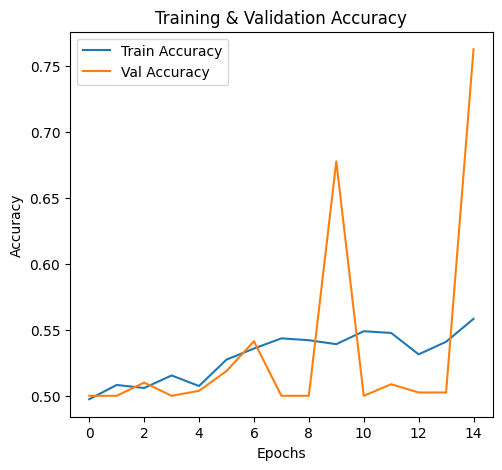

In [43]:
# Plot training & validation Accuracy
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(effnet_model_history.history['accuracy'], label='Train Accuracy')
plt.plot(effnet_model_history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training & Validation Accuracy')

This model has inefficient performance relative to the other models used.

## E. MobileNetV2

In [44]:
from tensorflow.keras.applications import MobileNetV2
mobnet_base_model = MobileNetV2(input_shape=(128, 128, 3), weights = "imagenet", include_top = False)
mobnet_base_model.trainable = False

mobnet_model = Sequential()
mobnet_model.add(mobnet_base_model) #Building on the base MobileNetV2 Model
mobnet_model.add(Flatten()) #Flattening Layer
mobnet_model.add(Dense(2, activation = "softmax")) #Output Layer
mobnet_model.summary()

9406464/9406464 [==============================] - 36s 4us/step
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_128 (Funct  (None, 4, 4, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten_7 (Flatten)         (None, 20480)             0         
                                                                 
 dense_7 (Dense)             (None, 2)                 40962     
                                                                 
Total params: 2,298,946
Trainable params: 40,962
Non-trainable params: 2,257,984
_________________________________________________________________


### Cats and Dogs Dataset:

In [45]:
#Compiling the model
opt = keras.optimizers.Adam(learning_rate = 0.01)

mobnet_model.compile(optimizer = opt, loss = "sparse_categorical_crossentropy", metrics=["accuracy"])

In [46]:
#Training MobileNetV2
epochs: int = 15
mobnet_model_history: History = mobnet_model.fit(train_generator1, epochs = epochs, validation_data = val_generator1)

Epoch 1/15
100/100 [==============================] - 8s 58ms/step - loss: 6.3210 - accuracy: 0.9180 - val_loss: 2.2559 - val_accuracy: 0.9640
Epoch 2/15
100/100 [==============================] - 4s 43ms/step - loss: 1.5639 - accuracy: 0.9720 - val_loss: 2.4368 - val_accuracy: 0.9720
Epoch 3/15
100/100 [==============================] - 4s 41ms/step - loss: 0.4410 - accuracy: 0.9865 - val_loss: 3.0587 - val_accuracy: 0.9600
Epoch 4/15
100/100 [==============================] - 4s 42ms/step - loss: 0.2085 - accuracy: 0.9935 - val_loss: 2.9550 - val_accuracy: 0.9600
Epoch 5/15
100/100 [==============================] - 4s 41ms/step - loss: 0.2319 - accuracy: 0.9945 - val_loss: 3.7628 - val_accuracy: 0.9660
Epoch 6/15
100/100 [==============================] - 4s 41ms/step - loss: 0.3892 - accuracy: 0.9925 - val_loss: 4.8999 - val_accuracy: 0.9510
Epoch 7/15
100/100 [==============================] - 4s 39ms/step - loss: 0.3594 - accuracy: 0.9920 - val_loss: 3.5268 - val_accuracy: 0.9660

In [47]:
#Testing EfficientNet
loss, accuracy = mobnet_model.evaluate(test_generator1)
print("Accuracy: ", accuracy)
print("Loss: ", loss)

5/5 [==============================] - 0s 31ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Accuracy:  1.0
Loss:  0.0


Text(0.5, 1.0, 'Training & Validation Accuracy')

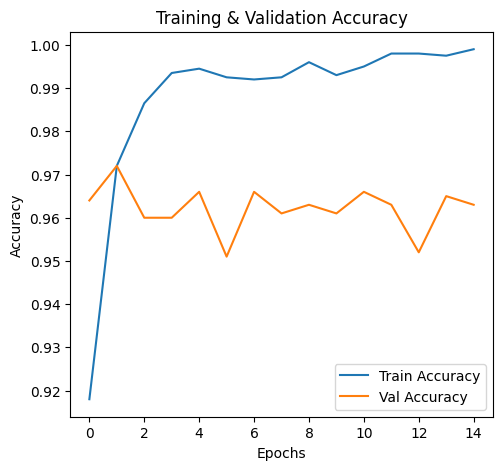

In [48]:
# Plot training & validation Accuracy
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(mobnet_model_history.history['accuracy'], label='Train Accuracy')
plt.plot(mobnet_model_history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training & Validation Accuracy')

### Face Mask Dataset:

In [49]:
#Compiling the model
opt = keras.optimizers.Adam(learning_rate = 0.01)

mobnet_model.compile(optimizer = opt, loss = "sparse_categorical_crossentropy", metrics=["accuracy"])

In [50]:
#Training MobileNetV2
epochs: int = 15
mobnet_model_history: History = mobnet_model.fit(train_generator2, epochs = epochs, validation_data = val_generator2)

Epoch 1/15
500/500 [==============================] - 17s 30ms/step - loss: 2.3827 - accuracy: 0.9779 - val_loss: 0.5031 - val_accuracy: 0.9937
Epoch 2/15
500/500 [==============================] - 15s 29ms/step - loss: 0.2642 - accuracy: 0.9966 - val_loss: 0.6472 - val_accuracy: 0.9912
Epoch 3/15
500/500 [==============================] - 15s 30ms/step - loss: 0.2159 - accuracy: 0.9973 - val_loss: 0.4025 - val_accuracy: 0.9925
Epoch 4/15
500/500 [==============================] - 14s 29ms/step - loss: 0.2628 - accuracy: 0.9970 - val_loss: 0.4028 - val_accuracy: 0.9950
Epoch 5/15
500/500 [==============================] - 15s 30ms/step - loss: 0.1248 - accuracy: 0.9978 - val_loss: 0.4787 - val_accuracy: 0.9950
Epoch 6/15
500/500 [==============================] - 14s 29ms/step - loss: 0.2013 - accuracy: 0.9975 - val_loss: 0.1639 - val_accuracy: 0.9950
Epoch 7/15
500/500 [==============================] - 15s 31ms/step - loss: 0.2492 - accuracy: 0.9982 - val_loss: 0.9529 - val_accuracy:

In [51]:
#Testing EfficientNet
loss, accuracy = mobnet_model.evaluate(test_generator2)
print("Accuracy: ", accuracy)
print("Loss: ", loss)

50/50 [==============================] - 1s 28ms/step - loss: 2.4668 - accuracy: 0.9919
Accuracy:  0.9919354915618896
Loss:  2.466826915740967


Text(0.5, 1.0, 'Training & Validation Accuracy')

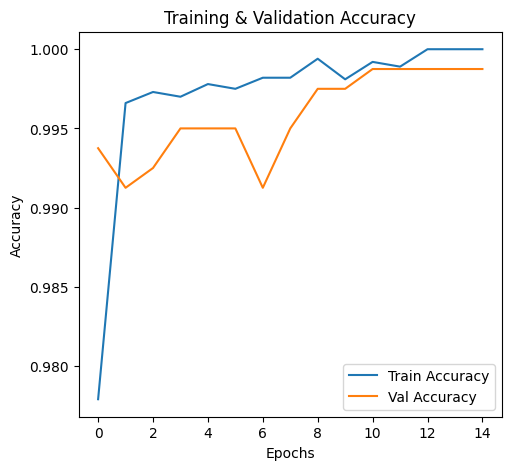

In [52]:
# Plot training & validation Accuracy
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(mobnet_model_history.history['accuracy'], label='Train Accuracy')
plt.plot(mobnet_model_history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training & Validation Accuracy')

The high high classificati